In [7]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [43]:
x_0 = tf.random.normal([20], 3, 1)
x_1 = tf.random.normal([20], 5.5, 1)
y_0 = tf.zeros(20)
y_1 = tf.ones(20)

print(x_0)
print(x_1)

x = tf.concat([x_0, x_1], axis=0)
y = tf.concat([y_0, y_1], axis=0)

print(x.shape)
print(y.shape)

tf.Tensor(
[4.359754   2.4985409  3.1810284  3.345573   3.123194   5.397022
 1.1623706  1.641368   2.918628   4.032759   3.32335    3.1562872
 1.9830768  3.64962    4.227969   0.91549826 2.0133562  1.2352504
 3.4161448  6.4164686 ], shape=(20,), dtype=float32)
tf.Tensor(
[4.8037825 5.680389  6.451111  7.6632338 5.192713  4.595879  4.536932
 7.3043776 5.335829  4.833062  5.075529  5.8167233 8.29907   3.3189344
 6.397407  6.8238955 4.5166416 5.6536207 6.9497185 4.2668114], shape=(20,), dtype=float32)
(40,)
(40,)


In [21]:
def plot_graph(X, Y, X_hat=None, Y_hat=None, str_title=None):
    fig = plt.figure(figsize=(8,6))
    
    if str_title:
        plt.title(str_title, fontsize=20, pad=20)
    
    plt.plot(X, Y, ls='none', marker='x')
    
    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)
    
    plt.tick_params(axis='both', labelsize=14)

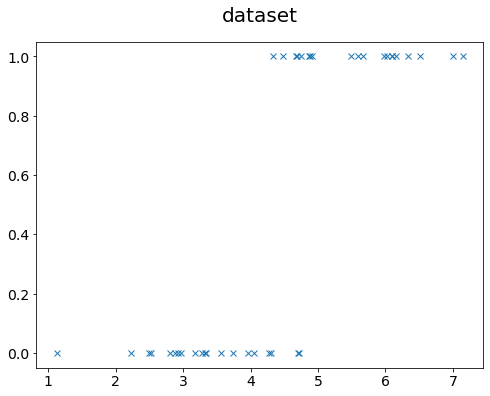

In [22]:
plot_graph(x, y, str_title='dataset')

In [34]:
W = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

print(W)

def cross_entropy(y_pred, y_true):
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return -tf.reduce_sum(y_true * tf.math.log(y_pred) + (1 - y_true) * (tf.math.log(1 - y_pred)))

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.3899936], dtype=float32)>


In [37]:
lr = 0.005
optimizer = tf.optimizers.SGD(lr)

def run_optimization():
    with tf.GradientTape() as g:
        pred = 1 / (1 + tf.exp(-1 * (W*x + b)))
        loss = cross_entropy(pred, y)
        
    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [ ]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
# plot_graph(x, y, X_hat=x_fl, Y_hat=

In [38]:
training_steps = 10000
display_step = 500
for step in range(end_step + 1, end_step + training_steps + 1):
    run_optimization()
    
    if step % display_step == 0:
        pred = 1 / (1 + tf.exp(-1 * (W*x + b)))
        loss = cross_entropy(pred, y)
        print(f"step: {step}, loss: {loss.numpy()}")
        
end_step = step

step: 1500, loss: 10.529069900512695
step: 2000, loss: 9.343148231506348
step: 2500, loss: 8.735313415527344
step: 3000, loss: 8.358487129211426
step: 3500, loss: 8.099082946777344
step: 4000, loss: 7.9082865715026855
step: 4500, loss: 7.761410713195801
step: 5000, loss: 7.644531726837158
step: 5500, loss: 7.5491485595703125
step: 6000, loss: 7.469753265380859
step: 6500, loss: 7.402609825134277
step: 7000, loss: 7.345078468322754
step: 7500, loss: 7.295244216918945
step: 8000, loss: 7.251678466796875
step: 8500, loss: 7.213287830352783
step: 9000, loss: 7.17922830581665
step: 9500, loss: 7.148827075958252
step: 10000, loss: 7.121549129486084
step: 10500, loss: 7.0969557762146
step: 11000, loss: 7.07469367980957
